In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import calendar

- microwave_data 来源于 3mircowave_data_season_compare.ipynb
- Wyoming_data 来源于 3Wyoming_data_season_compare.ipynb

In [48]:
microwave_data = pd.read_csv(r'I:\Data\Personal Data\graduation project\SACOL\microwave\Relative_humidity2009_Ti12.csv',index_col=0)
Wyoming_data = pd.read_csv(r'I:\Data\Personal Data\graduation project\yuzhongzhan\Relative_humidity2009_Ti12.csv',index_col=1)
Wyoming_data.index = microwave_data.index
Wyoming_data.drop(columns='Unnamed: 0',inplace=True)

In [49]:
def getMothDate(year, month):
    """
    返回某年某月的所有日期
    :param year:
    :param month:
    :return:
    """
    date_list = []
    for i in range(calendar.monthrange(year, month)[1] + 1)[1:]:
        str1 = str(year) + str("%02d" % month) + str("%02d" % i)
        date_list.append(str1)
    return date_list
 
list = []
year = 2009
for month in range(1,13):
    date_list = getMothDate(year, month)
    for date in date_list:
        list.append(date)

In [50]:
Wyoming_data.head(5)

,20090101,20090102,20090103,20090104,20090105,20090106,20090107,20090108,20090109,20090110,...,20091221,20091222,20091223,20091224,20091225,20091226,20091227,20091228,20091229,20091230
0.0,75.66750,38.12310,27.33320,17.65660,21.50810,28.28030,11.99330,4.62450,9.17512,12.32460,...,5.01926,49.39430,2.46938,9.90074,14.41680,29.58900,10.87670,8.39128,9.00735,35.09320
0.1,76.09301,37.71629,28.37685,17.55516,20.01547,27.36652,11.69735,4.67142,9.42113,12.72609,...,5.01636,51.29245,2.40630,10.21879,14.82164,29.68619,11.12506,8.67073,9.34819,36.92354
0.2,76.51952,37.30856,29.42270,17.45353,18.51969,26.45082,11.40076,4.71844,9.66768,13.12842,...,5.01346,53.19463,2.34309,10.53752,15.22734,29.78355,11.37396,8.95076,9.68976,38.75772
0.3,76.94686,36.89997,30.47084,17.35169,17.02067,25.53318,11.10352,4.76556,9.91473,13.53160,...,5.01055,55.10081,2.27975,10.85691,15.63391,29.88112,11.62339,9.23139,10.03205,40.59577
0.4,77.37516,36.49051,31.52117,17.24963,15.51847,24.61352,10.80566,4.81278,10.16233,13.93563,...,5.00763,57.01099,2.21627,11.17702,16.04133,29.97890,11.87334,9.51261,10.37505,42.43767


In [51]:
for i in range(len(list)):
    if(list[i] not in microwave_data.columns):
        microwave_data.insert(i,list[i],'')
for i in range(len(list)):
    if(list[i] not in Wyoming_data.columns):
        Wyoming_data.insert(i,list[i],'')

In [52]:
# data1 = pd.DataFrame(columns=list,index=Wyoming_data.index)
# for tim_point in data1.columns:
#     if(tim_point in Wyoming_data.columns):
#         data1[tim_point] = Wyoming_data[tim_point]
# Wyoming_data = data1

# data1 = pd.DataFrame(columns=list,index=microwave_data.index)
# for tim_point in data1.columns:
#     if(tim_point in microwave_data.columns):
#         data1[tim_point] = microwave_data[tim_point]
# microwave_data = data1
# del data1

In [53]:
drawing_data = pd.DataFrame(index=Wyoming_data.index)
drawing_data.insert(0,'mse','')
drawing_data.head(5)

,mse
0.0,
0.1,
0.2,
0.3,
0.4,


In [54]:
for row in range(Wyoming_data.shape[0]):
    nums = 0
    sums = 0
    for li in range(len(list)):
        if(isinstance(Wyoming_data.iloc[row,li],float) and isinstance(microwave_data.iloc[row,li],float)):
            nums += 1
            sums += np.square(Wyoming_data.iloc[row,li] - microwave_data.iloc[row,li])
    drawing_data.iloc[row,0] = sums/nums

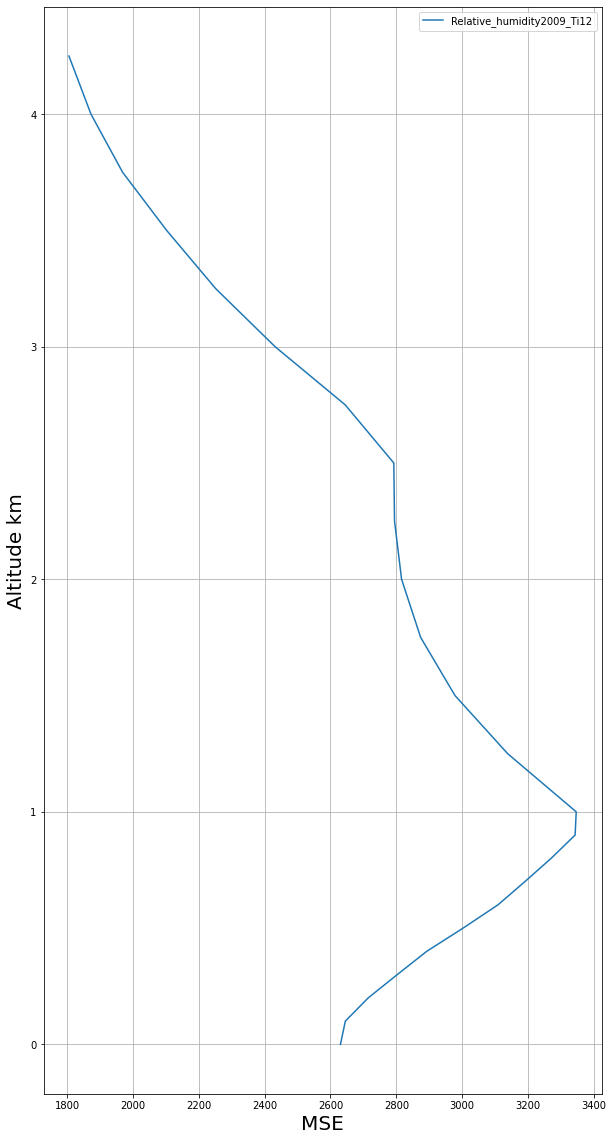

In [57]:
plt.rcParams['figure.figsize'] = (10.0,20.0)
#纵轴上分布高度数值
Height = drawing_data.index
plt.plot(drawing_data,Height,label='Relative_humidity2009_Ti12')
plt.xlabel('MSE',fontsize=20)
plt.ylabel('Altitude km',fontsize=20)
# 启动图例
plt.legend()
# 添加网格
plt.grid()
plt.show()

In [56]:
print(drawing_data)

               mse
0.00   2630.283661
0.10   2645.092351
0.20   2714.723524
0.30   2802.764909
0.40   2892.153167
0.50   3002.897093
0.60   3108.747395
0.70   3190.622316
0.80   3270.244245
0.90   3343.075932
1.00   3346.425274
1.25    3138.29621
1.50   2978.229236
1.75   2873.879166
2.00   2815.942724
2.25   2794.561796
2.50   2792.340295
2.75   2644.773419
3.00   2431.831991
3.25   2251.179108
3.50   2102.409081
3.75   1968.607992
4.00   1872.459668
4.25   1805.532054
4.50           NaN
4.75           NaN
5.00           NaN
5.25           NaN
5.50           NaN
5.75           NaN
6.00           NaN
6.25           NaN
6.50           NaN
6.75           NaN
7.00           NaN
7.25           NaN
7.50           NaN
7.75           NaN
8.00           NaN
8.25           NaN
8.50           NaN
8.75           NaN
9.00           NaN
9.25           NaN
9.50           NaN
9.75           NaN
10.00          NaN
